In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_column',None)

In [3]:
data=pd.read_csv(r'mushrooms.csv')

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
data.shape

(8124, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
data.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [9]:
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [141]:
####dummy_data=pd.get_dummies(data,drop_first=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
column=list(data.columns)

In [12]:
encoded_data=data[column].apply(encoder.fit_transform)

In [13]:
encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [14]:
encoded_data.shape

(8124, 23)

In [15]:
valid_fraction = 0.1
valid_size = int(len(encoded_data) * valid_fraction)

train = encoded_data[:-2 * valid_size]
valid = encoded_data[-2 * valid_size:-valid_size]
test = encoded_data[-valid_size:]

In [16]:

train.shape,test.shape,valid.shape

((6500, 23), (812, 23), (812, 23))

In [17]:
y=train.iloc[:,0]
x=train.iloc[:,1:]

In [18]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [30]:
data['veil-type'].unique()

array(['p'], dtype=object)

In [32]:
x.drop('veil-type',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
from sklearn.feature_selection import SelectKBest, chi2

feature_cols = x.columns

# Keep 5 features
selector = SelectKBest(chi2, k='all')

X_new_feature = selector.fit_transform(x[feature_cols], y)
X_new_feature

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 2, ..., 7, 4, 0],
       [2, 3, 4, ..., 7, 4, 0],
       [2, 2, 2, ..., 7, 4, 0]])

Feature 0: 21.278708
Feature 1: 63.297886
Feature 2: 65.112739
Feature 3: 812.687542
Feature 4: 396.040143
Feature 5: 0.002911
Feature 6: 457.207246
Feature 7: 789.775019
Feature 8: 2178.305278
Feature 9: 387.959839
Feature 10: 660.232307
Feature 11: 228.127678
Feature 12: 227.894251
Feature 13: 230.738765
Feature 14: 219.858265
Feature 15: 0.004715
Feature 16: 1.452912
Feature 17: 380.711268
Feature 18: 0.101656
Feature 19: 228.915632
Feature 20: 707.101973


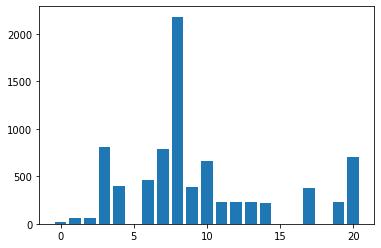

In [41]:
import matplotlib.pyplot as plt
for i in range(len(selector.scores_)):
	print('Feature %d: %f' % (i, selector.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

Feature 0: 21.278708
Feature 1: 63.297886
Feature 2: 65.112739
Feature 3: 812.687542
Feature 4: 396.040143
Feature 5: 0.002911
Feature 6: 457.207246
Feature 7: 789.775019
Feature 8: 2178.305278
Feature 9: 387.959839
Feature 10: 660.232307
Feature 11: 228.127678
Feature 12: 227.894251
Feature 13: 230.738765
Feature 14: 219.858265
Feature 15: 0.004715
Feature 16: 1.452912
Feature 17: 380.711268
Feature 18: 0.101656
Feature 19: 228.915632
Feature 20: 707.101973


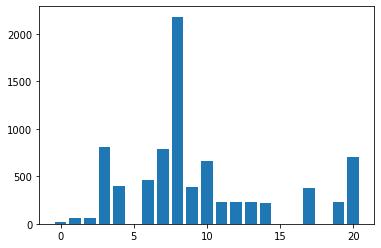

In [39]:
import matplotlib.pyplot as plt
for i in range(len(selector.scores_)):
	print('Feature %d: %f' % (i, selector.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

In [42]:
from sklearn.feature_selection import SelectKBest, chi2

feature_cols = x.columns

# Keep 5 features
selector = SelectKBest(chi2, k=14)

X_new_feature = selector.fit_transform(x[feature_cols], y)
X_new_feature

array([[1, 6, 0, ..., 4, 3, 5],
       [1, 0, 0, ..., 4, 2, 1],
       [1, 3, 0, ..., 4, 2, 3],
       ...,
       [0, 2, 0, ..., 0, 4, 0],
       [0, 7, 0, ..., 0, 4, 0],
       [0, 2, 0, ..., 0, 4, 0]])

Feature 0: 21.278708
Feature 1: 63.297886
Feature 2: 65.112739
Feature 3: 812.687542
Feature 4: 396.040143
Feature 5: 0.002911
Feature 6: 457.207246
Feature 7: 789.775019
Feature 8: 2178.305278
Feature 9: 387.959839
Feature 10: 660.232307
Feature 11: 228.127678
Feature 12: 227.894251
Feature 13: 230.738765
Feature 14: 219.858265
Feature 15: 0.004715
Feature 16: 1.452912
Feature 17: 380.711268
Feature 18: 0.101656
Feature 19: 228.915632
Feature 20: 707.101973


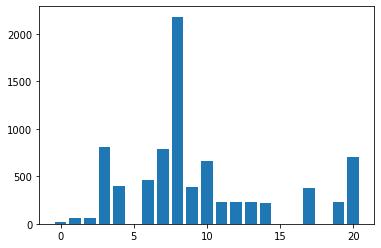

In [43]:
import matplotlib.pyplot as plt
for i in range(len(selector.scores_)):
	print('Feature %d: %f' % (i, selector.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)
plt.show()

In [45]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new_feature), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,1,6,0,0,1,4,0,3,2,2,7,7,0,0,4,0,3,5
1,0,0,0,1,0,0,0,0,4,0,2,2,2,7,7,0,0,4,0,2,1
2,0,0,0,1,3,0,0,0,5,0,2,2,2,7,7,0,0,4,0,2,3
3,0,0,0,1,6,0,0,1,5,0,3,2,2,7,7,0,0,4,0,3,5
4,0,0,0,0,5,0,1,0,4,1,3,2,2,7,7,0,0,0,0,0,1


In [46]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
#valid[selected_columns].head()

,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,population,habitat
6500,0,2,0,1,0,1,0,1,2,6,6,0,4,0
6501,0,7,0,1,0,1,0,2,2,6,6,0,4,0
6502,0,2,0,1,0,1,0,2,1,7,7,0,4,0
6503,0,2,0,1,0,1,0,1,1,7,6,0,4,0
6504,0,8,0,1,0,1,0,2,2,7,6,0,4,0


In [53]:
train_relivent_data=train[selected_columns]
test_relivent_data=test[selected_columns]
valid_relivent_data=valid[selected_columns]

In [58]:
train_relivent_data.head()

,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,population,habitat
0,1,6,0,1,4,0,3,2,2,7,7,4,3,5
1,1,0,0,0,4,0,2,2,2,7,7,4,2,1
2,1,3,0,0,5,0,2,2,2,7,7,4,2,3
3,1,6,0,1,5,0,3,2,2,7,7,4,3,5
4,0,5,1,0,4,1,3,2,2,7,7,0,0,1


In [59]:
test.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7312,1,3,3,2,0,8,1,0,1,0,1,0,2,2,7,6,0,2,1,0,7,4,2
7313,1,3,3,4,0,7,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,4
7314,0,5,2,3,0,5,1,1,0,7,0,0,1,2,7,7,0,2,2,4,7,2,1
7315,0,5,2,8,0,5,1,1,0,2,0,0,2,1,7,7,0,2,2,4,7,2,1
7316,1,3,3,4,0,2,1,0,1,0,1,0,1,1,7,7,0,2,1,0,7,4,0


In [61]:
y_test=test['class']

In [56]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [62]:
train_scaled=scale.fit_transform(train_relivent_data)
test_scaled=scale.fit_transform(test_relivent_data)

## Model Selection:

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score

## SVM

In [82]:
from sklearn import svm
sv=svm.SVC(kernel='linear')

In [83]:
sv.fit(train_relivent_data,y)

SVC(kernel='linear')

In [85]:
pred=sv.predict(test_relivent_data)

In [86]:
sv.score(test_relivent_data,y_test)

0.7093596059113301

In [87]:
from sklearn.model_selection import GridSearchCV
parameter=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

In [89]:
grid_search=GridSearchCV(estimator=sv,param_grid=parameter,scoring='accuracy',cv=10,n_jobs=-1)

In [91]:
grid_search=grid_search.fit(train_relivent_data,y)

In [92]:
accuracy=grid_search.best_score_
accuracy

0.9487692307692306

In [93]:
grid_search.best_params_

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [94]:
final_sv=svm.SVC(C=1,gamma=0.9,kernel='rbf')

In [95]:
final_sv.fit(train_relivent_data,y)

SVC(C=1, gamma=0.9)

In [96]:
final_sv.score(test_relivent_data,y_test)

0.9519704433497537

In [99]:
y_valid=valid['class']

In [101]:
pred=final_sv.predict(valid_relivent_data)

In [102]:
accuracy_score(y_valid,pred)

0.9889162561576355

In [100]:
final_sv.score(valid_relivent_data,y_valid)

0.9889162561576355